In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("adult.csv")
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
35063,36,Private,185325,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,37,United-States,<=50K
26516,29,Private,214881,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
23342,19,Private,151506,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
6965,28,Private,490332,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,40,United-States,>50K
21028,42,Private,107762,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
33938,37,Private,224947,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
37608,27,Private,101618,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
4854,39,Local-gov,123983,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
12370,35,Private,109133,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,40,?,<=50K
38593,37,Self-emp-not-inc,138940,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,37,United-States,<=50K


In [4]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
len(df)

48842

<AxesSubplot:xlabel='income', ylabel='count'>

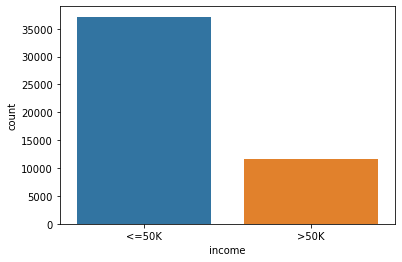

In [7]:
sns.countplot(df['income'])

In [8]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

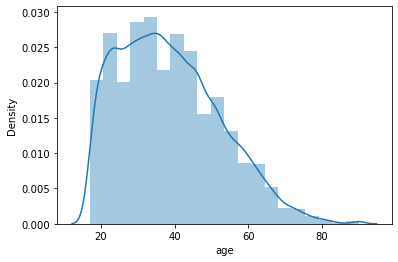

In [9]:
sns.distplot(df['age'], bins=20)

In [10]:
# Remove invalid data from table
df = df[df['workclass'] !='?']
df = df[df['occupation'] !='?']
df = df[df['native-country'] !='?']
len(df)

45222

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [12]:
# Create a new income_bi column
df['income_bi'] = df.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

In [13]:
# Remove redundant columns
df = df.drop(['income','fnlwgt','capital-gain','capital-loss','native-country'], axis=1)

In [14]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,income_bi
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,0


In [15]:
# Use one-hot encoding to transfer the categorical values to numeric values.
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender'])

In [16]:
df.head()

,age,educational-num,hours-per-week,income_bi,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,7,40,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,9,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,12,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,10,40,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,6,30,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [17]:
# split training and testing data
d_train = df[:25000]
d_test = df[25000:]
d_train_att = d_train.drop(['income_bi'], axis=1)
d_train_gt50 = d_train['income_bi']
d_test_att = d_test.drop(['income_bi'], axis=1)
d_test_gt50 = d_test['income_bi']
d_att = df.drop(['income_bi'], axis=1)
d_gt50 = df['income_bi']

In [18]:
# Fit a decision tree
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
t = t.fit(d_train_att, d_train_gt50)

In [19]:
# Finding accuracy of model
t.score(d_test_att, d_test_gt50)
# 0.820030995738086

0.8254870932647611

In [20]:
# Evaluating score using cross validation
scores = cross_val_score(t, d_att, d_gt50, cv=5)
# Show avarage score and +/- two standard deviations away (covering 95% or scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.83 (+/- 0.00)


In [21]:
# Create a sample csv for prediction
df.iloc[[0]].to_csv('prediction.csv', sep=',', encoding='utf-8', index=False)

# Prepare user profile
sample_df = pd.read_csv('prediction.csv', sep=',')

In [22]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_gt50, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std()*2))

Max depth: 1, Accuracy: 0.75 (+/- 0.00)
Max depth: 2, Accuracy: 0.81 (+/- 0.01)
Max depth: 3, Accuracy: 0.82 (+/- 0.00)
Max depth: 4, Accuracy: 0.82 (+/- 0.01)
Max depth: 5, Accuracy: 0.82 (+/- 0.01)
Max depth: 6, Accuracy: 0.82 (+/- 0.01)
Max depth: 7, Accuracy: 0.83 (+/- 0.00)
Max depth: 8, Accuracy: 0.83 (+/- 0.01)
Max depth: 9, Accuracy: 0.83 (+/- 0.01)
Max depth: 10, Accuracy: 0.83 (+/- 0.01)
Max depth: 11, Accuracy: 0.83 (+/- 0.01)
Max depth: 12, Accuracy: 0.82 (+/- 0.01)
Max depth: 13, Accuracy: 0.82 (+/- 0.01)
Max depth: 14, Accuracy: 0.82 (+/- 0.01)
Max depth: 15, Accuracy: 0.81 (+/- 0.01)
Max depth: 16, Accuracy: 0.81 (+/- 0.01)
Max depth: 17, Accuracy: 0.81 (+/- 0.01)
Max depth: 18, Accuracy: 0.80 (+/- 0.01)
Max depth: 19, Accuracy: 0.80 (+/- 0.01)
